

# 📌Import libraries .


In [1]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.pyplot.bar_label
import seaborn as sns;
from scipy import stats
import random
import datetime
from wordcloud import WordCloud
import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta

import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  classification_report,ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
#clustring
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import PorterStemmer ,WordNetLemmatizer
from nltk.corpus import wordnet
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input,Embedding, LSTM
from tensorflow.keras import utils


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



<div class="list-group" id="list-tab" role="tablist"><p></p>
<p style="background-color:#10b790; font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Helper Function ⚒</p>
</div>





In [5]:
#convert data frame to slower case
def lowerCase(x):
    return x.lower()

#check duplicate data
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . '
    else :
        return 'Data Is clean ,No Duplicate Data Found .'

# def car_name(x):
#     carname  = x.split(' ')[0]
#     return carname

# def car_model(x):
#     y   = x.split(' ')[1:]
#     carModel = ' '.join(y)
#     return  carModel

# def getfreq(x):
#     freq = x.split(' ')[-1]
#     return freq
def getCount(sent):
    word = sent.split()
    return len(word)


def calc_day_of_birth (day_num):
    today = date.today()
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay

def calc_day_of_employed(day_num):
    today = date.today()
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result

def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


def get_appartment(x):
    if x == 'House / apartment' :
       x= x.split(' /')[0]
    return x

def get_ducational_type(x):
    if x == 'Secondary / secondary special' :
       x= x.split(' /')[0]
    return x

def get_label_for_data(x):
    target = ''
    if x in (2,3,4,5) :
       target = 'YES' #risky
    else:
         target = 'NO'  #not risky

    return target

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(data[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(data[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(data[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = data[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def plot_feature_importance (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.coef_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[col_x],data[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
def average_plotting(df,col,output,number,title):
    data_list = data[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=data[data[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()
def draw_unique_value (df,title):
    plt.figure(figsize=(10,5))
    plt.title(title)
    unique_counts = df.nunique().to_dict()
    ax = sns.barplot(list(unique_counts.keys()), list(unique_counts.values()),palette='flare')
    ax.bar_label(ax.containers[0])
    plt.plot()



<div class="list-group" id="list-tab" role="tablist"><p></p>
<p style="background-color:#10b790; font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Reading Data</p>
</div>





In [7]:
import zipfile
import bz2

zip_path = "/content/train.ft.txt.bz2.zip"
extract_path = "/content/extracted_train_data"

# Extract zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Now locate the .bz2 file
bz2_file = extract_path + "/train.ft.txt.bz2"

# Read .bz2 file safely
with bz2.open(bz2_file, 'rt') as f:
    lines = f.readlines()

print(lines[:5])


['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n', "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n", '__label__2 Amazing!: This sou

In [8]:
import pandas as pd

data = pd.DataFrame(lines, columns=["text"])

# Strip newlines
data['text'] = data['text'].str.strip()

# Split into label and comment
data['label'] = data['text'].apply(lambda x: x.split(' ')[0])
data['comment'] = data['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Drop the original 'text' column if no longer needed
data = data[['label', 'comment']]

# Preview
print(data.head())

        label                                            comment
0  __label__2  Stuning even for the non-gamer: This sound tra...
1  __label__2  The best soundtrack ever to anything.: I'm rea...
2  __label__2  Amazing!: This soundtrack is my favorite music...
3  __label__2  Excellent Soundtrack: I truly like this soundt...
4  __label__2  Remember, Pull Your Jaw Off The Floor After He...


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   label    object
 1   comment  object
dtypes: object(2)
memory usage: 54.9+ MB



<div class="list-group" id="list-tab" role="tablist"><p></p>
<p style="background-color:#10b790; font-family:arial;color:#FFFFFF;font-size:170%;text-align:
center;border-radius:55px 1px;">Data Cleaning...</br>

*   check column type.
*   drop un necessary column.
*   check duplicate data
*   check  missing value.
*   basic text preprocessing

</p>
</div>





In [10]:
data.describe().T


,count,unique,top,freq
label,3600000,2,__label__2,1800000
comment,3600000,3600000,"Cute, but very thin: I buy many stockings and ...",1


In [11]:
#check duplicate data
check_duplicate(data)


'Data Is clean ,No Duplicate Data Found .'

In [12]:
print(data.shape)


(3600000, 2)


In [13]:
data.isnull().sum().sort_values(ascending=True)


,0
label,0
comment,0


<Axes: >

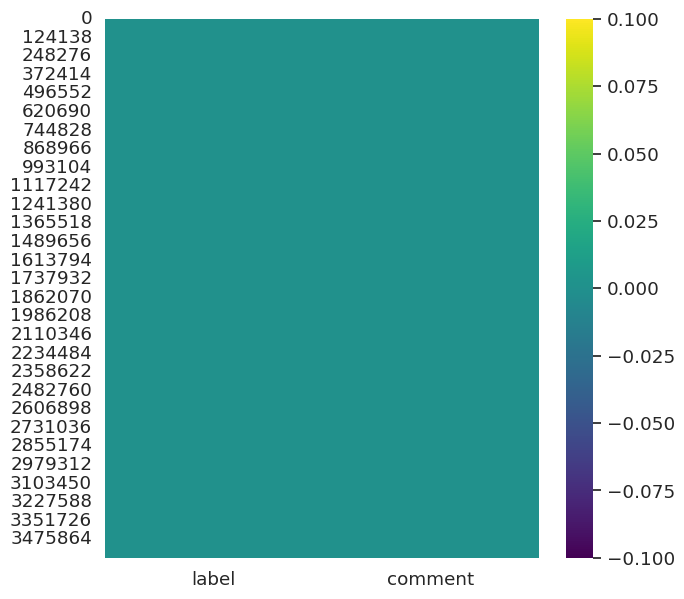

In [10]:
cols =data.columns
sns.heatmap(data[cols].isnull(), cmap='viridis')


In [15]:
# Drop rows with any NaN values
data.dropna(inplace=True)


<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Dataset Basic Informations</center></h3>
<p>● The  Data set  consists of 2 columns and 180000 rows </p>
<p>● The Dat Set is Totaly Balanced </p>

<p>● Data totaly cleand and no duplicate data  and no empty cells .</p>

</div>
</div>

# 📌Data Analaysis & Visualization
in this part we will analays and versialize each part of data to be in near step from our goal then pased on deployed models we will sense best factior that affect on our bussiness goal



<font size="4" >**label** </font> </br>




<font size="4" >**text** </font> </br>

In [ ]:
# # get head line count per articls
# data['textCount']=data['text'].apply(getCount)

# df.sort_values(by=[ 'textCount'], ascending=False)


In [ ]:
# categorical_plotting(df,'label','total count of label')


# 📌Text Cleaning

In [14]:
class CleanText:
    def __init__(self):

        self.stopwords_en = set(stopwords.words('english'))
        self.stopwords_ar = set(stopwords.words('arabic'))
        self.custom_stopwords = {'يوم', 'ان', 'الي', 'انت', 'انا', 'علي', 'الا', 'اللي', 'الله', 'اللهم'}
        self.all_stopwords = self.stopwords_en.union(self.stopwords_ar, self.custom_stopwords)
        keepWordstoStopWords = {"not", "no", "never", "neither", "nor", "very",
                   "really", "too", "extremely", "quite", "but", "however",
                   "although", "though", "if", "unless", "except"}

        self.all_stopwords -= keepWordstoStopWords

        arabic_punct = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
        self.punctuations = arabic_punct + string.punctuation

    def to_lowercase(self, text):
        return str(text).lower()

    def remove_urls_mentions_hashtags(self, text):
        # Remove URLs, mentions, and hashtags
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = re.sub(r'\@\w+|\#', '', text)
        return text

    def remove_emoji(self, text):
        # Remove emojis using Unicode ranges
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    def normalize_text(self, text):
        text = re.sub("[إأآا]", "ا", text)
        text = re.sub("ى", "ي", text)
        text = re.sub("ؤ", "ء", text)
        text = re.sub("ئ", "ء", text)
        text = re.sub("ة", "ه", text)
        return text

    def keep_only_arabic_english_letters(self, text):
        # Keep only Arabic and English letters
        return re.sub('[^a-zA-Z\u0621-\u064A]', ' ', text)

    def remove_digits(self, text):
        return re.sub(r'\d+', '', text)

    def remove_punctuation(self, text):
        return re.sub(f"[{re.escape(self.punctuations)}]", " ", text  )

    def remove_stopwords(self, text):
        return ' '.join([word for word in text.split() if word not in self.all_stopwords])

    def remove_extra_spaces(self, text):
        # Remove extra whitespaces and strip
        return re.sub(r'\s+', ' ', text).strip()



    def setTextClean(self, text):
        text = self.to_lowercase(text)
        text = self.remove_urls_mentions_hashtags(text)
        text = self.remove_emoji(text)
        text = self.normalize_text(text)
        text = self.keep_only_arabic_english_letters(text)
        text = self.remove_digits(text)
        text = self.remove_punctuation(text)
        text = self.remove_stopwords(text)
        text = self.remove_extra_spaces(text)
        return text

cleaner =  CleanText()


In [16]:
#apply text cleaning to in text
data['comment']= data['comment'].apply(cleaner.setTextClean)
data.head(10)


,label,comment
0,__label__2,stuning even non gamer sound track beautiful p...
1,__label__2,best soundtrack ever anything reading lot revi...
2,__label__2,amazing soundtrack favorite music time hands i...
3,__label__2,excellent soundtrack truly like soundtrack enj...
4,__label__2,remember pull jaw floor hearing if played game...
5,__label__2,absolute masterpiece quite sure actually takin...
6,__label__1,buyer beware self published book if want know ...
7,__label__2,glorious story loved whisper wicked saints sto...
8,__label__2,five star book finished reading whisper wicked...
9,__label__2,whispers wicked saints easy read book made wan...


# 📌Data Preperation For Modeling


<font size="4" >**1-Steaming** </font> </br>
Stemming is a text preprocessing technique used in Natural Language Processing (NLP) to reduce a word to its root or base form


<font size="4" >**2-Lemmatization** </font> </br>
Lemmatization is a text preprocessing technique in Natural Language Processing (NLP) that reduces words to their dictionary base form

In [24]:
# pip install --upgrade --force-reinstall nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
  Attempting uninstall: regex
    Found existing installation: regex 2024.11.6
    Uninstalling regex-2024.11.6:
      Successfully uninstalled regex-2024.11.6
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstall

In [19]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

tokenizer = TreebankWordTokenizer()
lem = WordNetLemmatizer()

def NLPpreprocessing(text):
    tokens = tokenizer.tokenize(text)
    tokens = [lem.lemmatize(w) for w in tokens]
    return ' '.join(tokens)

data['comment'] = data['comment'].apply(NLPpreprocessing)


<div class="list-group" id="list-tab" role="tablist"><p></p>
<p style="background-color:#10b790; font-family:arial;color:#FFFFFF;font-size:170%;text-align:
center;border-radius:55px 1px;">Vicorizing Data Using TFIDF
</p>
</div>


In [22]:
x = data['comment']
y = data['label'].replace({"__label__1": 1, "__label__2": 2})
y

/tmp/ipython-input-22-3012200247.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['label'].replace({"__label__1": 1, "__label__2": 2})


,label
0,2
1,2
2,2
3,2
4,2
...,...
3599995,1
3599996,1
3599997,1
3599998,1


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9051208333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.90      0.90    359759
           2       0.90      0.91      0.91    360241

    accuracy                           0.91    720000
   macro avg       0.91      0.91      0.91    720000
weighted avg       0.91      0.91      0.91    720000



In [29]:
new_comments = ["This product is great", "Worst experience ever"]
new_comments_vectorized = vectorizer.transform(new_comments)
predictions = model.predict(new_comments_vectorized)
print(predictions)
#2-->good 1-->bad

[2 1]


In [30]:
import joblib

# Save model
joblib.dump(model, 'sentiment_model.joblib')

# Save vectorizer
joblib.dump(vectorizer, 'vectorizer.joblib')

print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.


In [31]:
# model = joblib.load('sentiment_model.joblib')
# vectorizer = joblib.load('vectorizer.joblib')


In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Companies and models
companies_models = {
    'Dell': ['Inspiron 3530', 'Inspiron 3531', 'Vostro 3520'],
    'Lenovo': ['Thinkpad X1', 'IdeaPad Slim 3'],
    'HP': ['Pavilion 15', 'Envy x360'],
    'Asus': ['Zenbook 14', 'Vivobook 15'],
    'Acer': ['Aspire 5', 'Swift 3'],
    'MSI': ['Modern 15', 'GF63 Thin'],
    'Apple': ['Macbook Air M2', 'Macbook Pro M2']
}

# Sample names and review texts
names = ['Avi', 'Riya', 'Sayak', 'Soham', 'Arjun', 'Sneha', 'Raj', 'Neha', 'Akash', 'Joy', 'Ritu', 'Vikram', 'Nisha', 'Dev', 'Priya', 'Karan', 'Tanvi', 'Rohit', 'Nidhi', 'Sayan']

positive_reviews = [
    'Excellent battery life and display quality',
    'Good for office use and multitasking',
    'Very sturdy and reliable laptop',
    'Lightweight and easy to carry',
    'Great design and battery backup',
    'Good laptop in budget',
    'Perfect for gaming and development',
    'Fantastic performance and battery life',
    'Worth the price for its performance',
    'Runs very smoothly and fast'
]

negative_reviews = [
    'Performance is average',
    'Heating issues after long use',
    'Speaker volume is very low',
    'Trackpad stopped working after 2 months',
    'Too heavy to carry daily',
    'Not compatible with some software',
    'Screen flickers sometimes',
    'Battery drains too fast',
    'WiFi connectivity issues',
    'Keys are not responsive'
]

data = []
date_start = datetime(2025, 7, 1)

for i in range(100):
    company = random.choice(list(companies_models.keys()))
    model_name = random.choice(companies_models[company])
    user_name = random.choice(names)
    rating = random.randint(1, 5)
    is_positive = rating >= 4
    review_text = random.choice(positive_reviews if is_positive else negative_reviews)
    sentiment = 2 if is_positive else 1
    date = (date_start + timedelta(minutes=random.randint(0, 10000))).strftime('%Y-%m-%d %H:%M:%S')
    
    data.append([company, model_name, user_name, rating, review_text, sentiment, date])

# Create dataframe
df = pd.DataFrame(data, columns=['company', 'model_name', 'user_name', 'rating', 'review_text', 'sentiment', 'date'])

# Save to CSV
df.to_csv('reviews.csv', index=False)

print("✅ Generated 100 dummy reviews and saved to reviews.csv")


✅ Generated 100 dummy reviews and saved to reviews.csv


In [2]:
import pandas as pd

DATA_FILE = r'C:\Users\Arunava Chakraborty\Desktop\Senti_Analys\reviews.csv'

# Load existing data
df = pd.read_csv(DATA_FILE)

# Check if 'aspect_sentiments' already exists
if 'aspect_sentiments' not in df.columns:
    df['aspect_sentiments'] = ''

# Save back to CSV
df.to_csv(DATA_FILE, index=False)

print("✅ CSV schema updated successfully.")


✅ CSV schema updated successfully.


In [7]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Parameters
N = 100  # number of dummy reviews

companies = ['HP', 'Dell', 'Apple', 'Lenovo', 'Asus']
models = ['I6', 'Inspiron', 'MacBookAir', 'Yoga', 'Vivobook']
users = ['Jishnu', 'Arunava', 'Avighyan', 'Ria', 'Kiran', 'Soham', 'Neha', 'Dev', 'Raj', 'Meera',
         'Suman', 'Diya', 'Sudip', 'Amrita', 'Tuhin', 'Srija', 'Ritwik', 'Sanya', 'Harshit', 'Chirag']
aspects = ['battery', 'display', 'performance', 'design', 'keyboard', 'price', 'camera', 'sound']

data = []
for _ in range(N):
    company = random.choice(companies)
    model = random.choice(models)
    user = random.choice(users)
    rating = random.randint(1, 5)
    date = (datetime.now() - timedelta(days=random.randint(0, 60))).strftime('%Y-%m-%d %H:%M:%S')

    # Choose 1-2 aspects mentioned in review
    chosen_aspects = random.sample(aspects, k=random.randint(1, 2))
    review_text = " ".join([f"Good {asp}" if random.random() > 0.5 else f"Bad {asp}" for asp in chosen_aspects])

    # Sentiment label (1 = negative, 2 = positive) based on review content
    sentiment = 2 if 'Good' in review_text else 1

    # Aspect sentiments dict
    aspect_sentiments = {}
    for asp in chosen_aspects:
        if f"Good {asp}" in review_text:
            aspect_sentiments[asp] = 'positive'
        elif f"Bad {asp}" in review_text:
            aspect_sentiments[asp] = 'negative'
        else:
            aspect_sentiments[asp] = 'neutral'

    data.append([company, model, user, rating, review_text, sentiment, date, str(aspect_sentiments)])

# Create dataframe
df_dummy = pd.DataFrame(data, columns=['company', 'model_name', 'user_name', 'rating',
                                       'review_text', 'sentiment', 'date', 'aspect_sentiments'])

# Save to CSV
df_dummy.to_csv('reviews.csv', index=False)

print("✅ Dummy reviews generated and saved to dummy_reviews.csv")


✅ Dummy reviews generated and saved to dummy_reviews.csv
